<a href="https://colab.research.google.com/github/masgarih/rnaseq/blob/main/Disease_prediction_moslem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**"This file is developed for lung cancer prediction using gene expression data and was authored by Moslem Asgari."**

If you'd like it to sound a bit more formal (e.g., for a thesis or publication), you could write:

**"This file presents a methodology for predicting lung cancer based on gene expression data, authored by Moslem Asgari."**



In [47]:
## Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import classification_report

In [48]:
## mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data collection

In [49]:
## Load the data and concatenate them into a single DataFrame
lung1 = pd.read_csv("/content/drive/MyDrive/lung/GSE87340.csv.zip")
lung2 = pd.read_csv("/content/drive/MyDrive/lung/GSE60052.csv.zip")
lung3 = pd.read_csv("/content/drive/MyDrive/lung/GSE40419.csv.zip")
lung4 = pd.read_csv("/content/drive/MyDrive/lung/GSE37764.csv.zip")
lung_1_4 = pd.concat([lung1, lung2, lung3, lung4])

In [50]:
## Print the first 5 rows and 10 columns
print(lung_1_4.iloc[:,0:10].head())

           ID    class  ENSG00000000003  ENSG00000000005  ENSG00000000419  \
0  SRR4296063   Normal        10.728260         4.668142        10.278195   
1  SRR4296064    Tumor        11.332606         2.329988        10.127734   
2  SRR4296065   Normal         9.951182         4.264426        10.288874   
3  SRR4296066    Tumor        12.185680         2.798643        10.178582   
4  SRR4296067   Normal         9.875179         2.922071        10.444479   

   ENSG00000000457  ENSG00000000460  ENSG00000000938  ENSG00000000971  \
0        10.184036         8.215333        11.310861        13.178872   
1        10.167900         8.174060        10.399611        13.208972   
2        10.093258         8.011385        11.814572        14.038661   
3        10.401606         8.902321        10.294009        13.170466   
4        10.435843         8.692961        12.604934        13.538341   

   ENSG00000001036  
0        11.469473  
1        11.510862  
2        11.651766  
3        11.54

# Data Preprocessing

In [51]:
## Print the total number of missing values for each columns
print(lung_1_4.isna().sum())

ID                 0
class              0
ENSG00000000003    0
ENSG00000000005    0
ENSG00000000419    0
                  ..
ENSG00000285990    0
ENSG00000285991    0
ENSG00000285992    0
ENSG00000285993    0
ENSG00000285994    0
Length: 58737, dtype: int64


In [52]:
## Print the total number of missing values for all gene expression columns combined together
print(lung_1_4.isna().sum().sum())

0


# EDA

In [53]:
## plotting the distribution of samples corresponding to each lung cancer type
df = lung_1_4['class'].value_counts().reset_index()

In [54]:
df.head()

,class,count
0,Tumor,191
1,Normal,110
2,Normal,6
3,Tumor,6


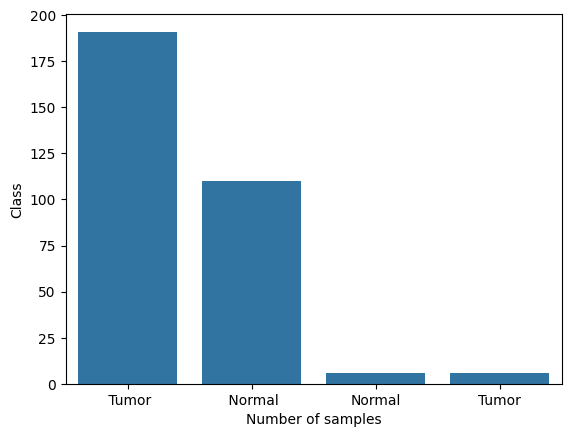

In [55]:
## visualize the classes
sns.barplot(x = "class", y = "count", data=df)
plt.xlabel("Number of samples")
plt.ylabel("Class")
plt.show()

In [56]:
## Look at the different classes closely
print(set(lung_1_4['class']))

{'Normal', ' Tumor', 'Tumor', ' Normal'}


In [57]:
## rename those right away using the following replace method
lung_1_4['class'] = lung_1_4['class'].replace(' Normal', 'Normal')
lung_1_4['class'] = lung_1_4['class'].replace(' Tumor', 'Tumor')

In [58]:
print(set(lung_1_4['class']))

{'Normal', 'Tumor'}


In [59]:
## plotting the distribution of samples corresponding to each lung cancer type
df = lung_1_4['class'].value_counts().reset_index()

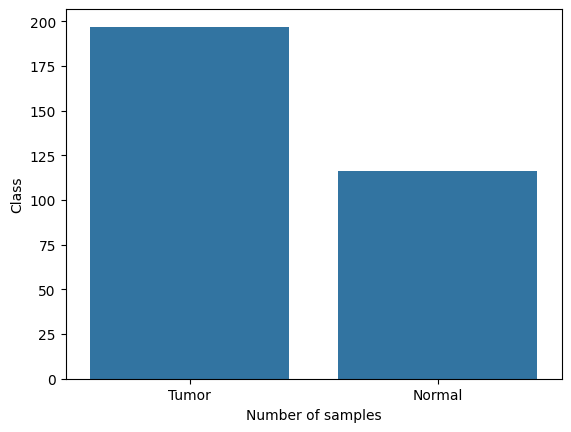

In [60]:
## visualize the classes after fixing the columns
sns.barplot(x = "class", y = "count", data=df)
plt.xlabel("Number of samples")
plt.ylabel("Class")
plt.show()

# Data transformation


In [61]:
## Restrict our dataset to the first 10 columns and convert the data from wide format to long format
lung_1_4_m = pd.melt(lung_1_4.iloc[:,1:12], id_vars = "class")

<ipython-input-62-8a7f0ce4f28f>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


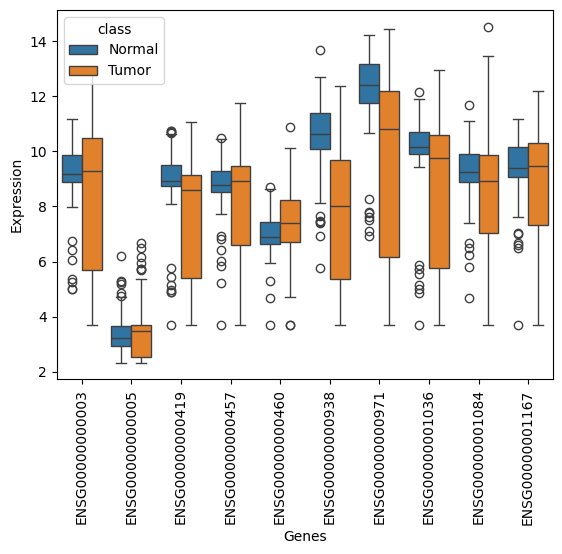

In [62]:
## Visualization for the distribution of expression across selected samples
ax = sns.boxplot(x = "variable" , y = "value", data = lung_1_4_m, hue = "class")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Genes")
plt.ylabel("Expression")
plt.show()

# Data splitting

In [63]:
## Drop the ID and class columns in the dataset, and convert it to a NumPy ndarray
x_data = lung_1_4.drop(['class', 'ID'], axis = 1).values

In [64]:
## Create a NumPy ndarray for the labels from the subset data
y_data = lung_1_4['class'].values

In [65]:
## Convert the categorical data to numbers
classes = lung_1_4['class'].unique().tolist()
print(classes)

['Normal', 'Tumor']


In [66]:
## Convert the classes into ordinals
func = lambda x: classes.index(x)
y_data = np.asarray([func(i) for i in y_data], dtype ="float32")

In [67]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 42, test_size=0.25, stratify = y_data)

# Model training

In [68]:
## Instantiating an object using the LogisticRegression function
model_lung1 = LogisticRegression()

In [69]:
## Fit the training data consisting of features and labels
model_lung1.fit(X_train, y_train)

LogisticRegression()

# Model Evaluation

In [70]:
## Model predictions on a single sample
pred = model_lung1.predict(X_test[12].reshape(1,-1))
print(pred)

[1.]


In [71]:
## Model predictions on all samples from the test data
all_pred_lung= model_lung1.predict(X_test)

In [72]:
## Accuracy score
print(model_lung1.score(X_test, y_test))

0.9620253164556962


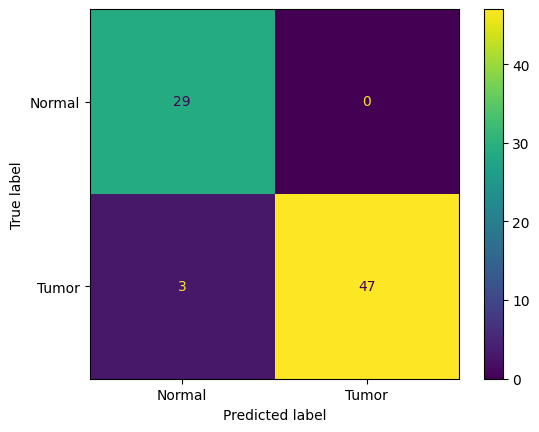

In [73]:
## Confusion matrix
cm = confusion_matrix(y_test, all_pred_lung)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels = ["Normal", 'Tumor'])
disp.plot()
plt.show()

In [74]:
## Classification_report
print(classification_report(y_test, all_pred_lung))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        29
         1.0       1.00      0.94      0.97        50

    accuracy                           0.96        79
   macro avg       0.95      0.97      0.96        79
weighted avg       0.97      0.96      0.96        79



AUC = 0.997


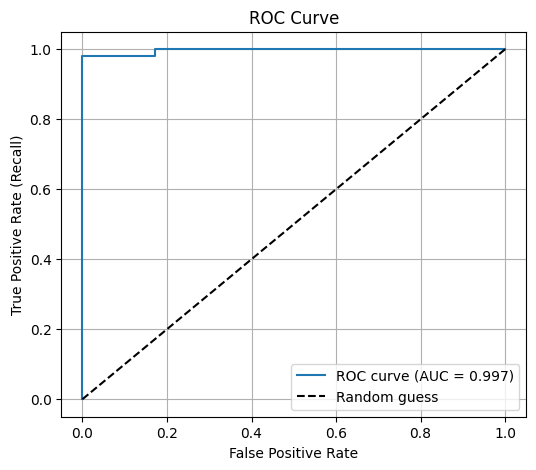

In [75]:
## Receiver Operating Characteristic(ROC)_Area Under the Curve(AUC)
y_scores = model_lung1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print(f"AUC = {roc_auc:.3f}")

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Prediction of lung cancer based on gene expression values

In [76]:
import numpy as np
np.unique(y_test, return_counts=True) #['Normal'-> 0, 'Tumor'-> 1]


(array([0., 1.], dtype=float32), array([29, 50]))

In [77]:
X_test[0].reshape(1, -1)

array([[7.21658496, 3.70894051, 5.4112351 , ..., 4.536347  , 4.978437  ,
        6.790901  ]])

In [78]:
model_lung1.predict(X_test[0].reshape(1, -1))

array([1.], dtype=float32)

In [79]:
model_lung1.predict(X_test[14].reshape(1, -1))

array([0.], dtype=float32)